# Getting Started with BigQuery SQL Searches
First we need to install some packages and load the BigQuery extension. We can run this by clicking on the cell below and then clicking the Run button above.

In [13]:
!pip install google.cloud.bigquery
!pip install google.cloud.storage
!pip3 install --upgrade google-cloud-bigquery

!pip install google --user
!pip install --upgrade 'google-cloud-bigquery[bqstorage,pandas]' --user

  Using cached https://files.pythonhosted.org/packages/31/b5/f9deb0ceb925fe04afdfb4d2258ef64959e22e45468432f5b97caf1b85ba/google_cloud_bigquery-2.26.0-py2.py3-none-any.whl
ERROR: Could not install packages due to an EnvironmentError: [Errno 13] Permission denied: '/opt/tljh/user/lib/python3.7/site-packages/google_cloud_bigquery-2.26.0-py3.9-nspkg.pth'
Consider using the `--user` option or check the permissions.

  Using cached https://files.pythonhosted.org/packages/76/03/55d5255ce6226d8908d5354f3d2ab5749a0ec8b75efc9cdd7d8a45db17b0/google_cloud_storage-1.42.1-py2.py3-none-any.whl
ERROR: Could not install packages due to an EnvironmentError: [Errno 13] Permission denied: '/opt/tljh/user/lib/python3.7/site-packages/google_cloud_storage-1.42.1-py3.9-nspkg.pth'
Consider using the `--user` option or check the permissions.

  Cache entry deserialization failed, entry ignored
  Using cached https://files.pythonhosted.org/packages/31/b5/f9deb0ceb925fe04afdfb4d2258ef64959e22e45468432f5b97caf1b8

In [14]:
%load_ext google.cloud.bigquery

The google.cloud.bigquery extension is already loaded. To reload it, use:
  %reload_ext google.cloud.bigquery


## Basic Query
Here is a simple query to find 5 runs submitted for the organsim 'Homo sapiens' from the nih-sra-datastore project. The first line you will see is %%bigquery. This command tells Jupyter to use the bigquery package we just installed. Everything below that line is the SQL query.
This query searches for all (*) columns in the metadata table from the sra database in the project. We will filter for only the rows where the organism name is 'Homo sapiens' and limit the output to only the first 5 rows by using the LIMIT function. One limitation of our view in Jupyter is only 20 columns are displayed. At the bottom of the results you will see 5 rows X 36 columns. But if you look closely there are 16 columns that are not visible in the middle of the output chart.

In [15]:
%%bigquery

SELECT *
FROM `nih-sra-datastore.sra.metadata`
WHERE organism = 'Homo sapiens'
LIMIT 5

Downloading: 100%|██████████| 5/5 [00:00<00:00,  7.50rows/s]


,acc,assay_type,center_name,consent,experiment,sample_name,instrument,librarylayout,libraryselection,librarysource,...,geo_loc_name_country_continent_calc,geo_loc_name_sam,ena_first_public_run,ena_last_update_run,sample_name_sam,datastore_filetype,datastore_provider,datastore_region,attributes,jattr
0,SRR15594527,AMPLICON,BROAD INSTITUTE,public,SRX11892137,pDNA_CCTCCATA,NextSeq 500,PAIRED,PCR,SYNTHETIC,...,None,[],[],[],[],"[fastq, sra]","[gs, ncbi, s3]","[gs.US, ncbi.public, s3.us-east-1]","[{'k': 'bases', 'v': '583122600'}, {'k': 'byte...","{""bases"": 583122600, ""bytes"": 226139111, ""age_..."
1,ERR2535544,AMPLICON,ETH ZURICH D-BSSE,public,ERX2554096,SAMEA4610272,Illumina HiSeq 2500,PAIRED,PCR,GENOMIC,...,None,[],[2021-05-07],[2018-11-16],[P06_TU2],"[fastq, sra]","[gs, ncbi, s3]","[gs.US, ncbi.public, s3.us-east-1]","[{'k': 'bases', 'v': '1009978386'}, {'k': 'byt...","{""bases"": 1009978386, ""bytes"": 557065767, ""com..."
2,ERR2536114,AMPLICON,ETH ZURICH D-BSSE,public,ERX2554666,SAMEA4610346,Illumina HiSeq 2500,PAIRED,PCR,GENOMIC,...,None,[],[2021-05-07],[2018-11-16],[P31_TU1],"[fastq, sra]","[gs, ncbi, s3]","[gs.US, ncbi.public, s3.us-east-1]","[{'k': 'bases', 'v': '924803470'}, {'k': 'byte...","{""bases"": 924803470, ""bytes"": 486513717, ""comm..."
3,ERR5639465,AMPLICON,WASHINGTON UNIVERSITY SCHOOL OF MEDICINE,public,ERX5355449,SAMEA8474305,Illumina MiSeq,PAIRED,PCR,GENOMIC,...,None,[],[2021-04-01],[2021-03-31],[CASPx..MC7025...DN.NKHu-TACGCGAT-55],"[fastq, sra]","[gs, ncbi, s3]","[gs.US, ncbi.public, s3.us-east-1]","[{'k': 'bases', 'v': '6365310'}, {'k': 'bytes'...","{""bases"": 6365310, ""bytes"": 3269615, ""common_n..."
4,ERR5639635,AMPLICON,WASHINGTON UNIVERSITY SCHOOL OF MEDICINE,public,ERX5355619,SAMEA8474475,Illumina MiSeq,PAIRED,PCR,GENOMIC,...,None,[],[2021-04-01],[2021-03-31],[ASNa..MA8790...PowerSoil.NKHu-GAGTGTCT-55],"[fastq, sra]","[gs, ncbi, s3]","[gs.US, ncbi.public, s3.us-east-1]","[{'k': 'bases', 'v': '8333910'}, {'k': 'bytes'...","{""bases"": 8333910, ""bytes"": 4566303, ""common_n..."


## Searching Other Tables
The second database in the nih-sra-datastore project contains data from the SRA Taxonomy Analysis Tool (STAT) as well as some from the Taxonomy database. The analysis will use the Taxonomy Database Identifier (tax ID) in the results. You can find the tax_id for any entry in the taxonomy table using a search like the one below. 

In [16]:
%%bigquery

SELECT * 
FROM `nih-sra-datastore.sra_tax_analysis_tool.taxonomy`
WHERE sci_name = 'Homo sapiens'


Downloading: 100%|██████████| 1/1 [00:00<00:00,  1.58rows/s]


,tax_id,parent_id,rank,sci_name,names,ilevel,ileft,iright
0,9606,9605,species,Homo sapiens,"[{'name': 'Home sapiens', 'name_class': 'missp...",30,212423,212424


## Finding How the Database is Organized and Listing Columns
Knowing what the columns names are and the datatypes will be important when writing queries. For example SQL requires quotes around string values in searches but no quotes for integers. Here is the structure of databases and tables in the nih-sra-datastore.
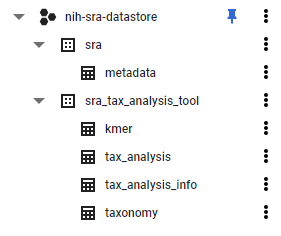

We can use the query below to get a listing of the columns in the database schema as well as what type of data is in them. For a text description of the contents of a column you can go to the SRA documentation page. <https://www.ncbi.nlm.nih.gov/sra/docs/sra-cloud-based-examples/>

In [17]:
%%bigquery

SELECT table_name, column_name, data_type 
FROM `nih-sra-datastore.sra`.INFORMATION_SCHEMA.COLUMNS

Downloading: 100%|██████████| 36/36 [00:00<00:00, 57.13rows/s]


,table_name,column_name,data_type
0,metadata,acc,STRING
1,metadata,assay_type,STRING
2,metadata,center_name,STRING
3,metadata,consent,STRING
4,metadata,experiment,STRING
5,metadata,sample_name,STRING
6,metadata,instrument,STRING
7,metadata,librarylayout,STRING
8,metadata,libraryselection,STRING
9,metadata,librarysource,STRING


## Listing Tables in a Database
The `nih-sra-datastore.sra` database only has a single table but the STAT database has multiple tables. We can list each using this query.

In [18]:
%%bigquery

SELECT * 
FROM `nih-sra-datastore.sra_tax_analysis_tool`.INFORMATION_SCHEMA.TABLES

Downloading: 100%|██████████| 4/4 [00:00<00:00,  6.19rows/s]


,table_catalog,table_schema,table_name,table_type,is_insertable_into,is_typed,creation_time
0,nih-sra-datastore,sra_tax_analysis_tool,tax_analysis,BASE TABLE,YES,NO,2020-03-27 00:40:42.283000+00:00
1,nih-sra-datastore,sra_tax_analysis_tool,kmer,BASE TABLE,YES,NO,2021-05-10 15:53:52.386000+00:00
2,nih-sra-datastore,sra_tax_analysis_tool,taxonomy,BASE TABLE,YES,NO,2020-03-27 00:42:12.488000+00:00
3,nih-sra-datastore,sra_tax_analysis_tool,tax_analysis_info,BASE TABLE,YES,NO,2020-03-27 00:41:33.083000+00:00


## Listing All Columns in the SRA Tax Analysis Tool Database
The STAT database has more tables than we saw in the metadata table but they are stored in multiple tables. The query we used to list the metadata columns will also work for the STAT database.  

In [19]:
%%bigquery

SELECT table_name, column_name, data_type 
FROM `nih-sra-datastore.sra_tax_analysis_tool`.INFORMATION_SCHEMA.COLUMNS

Downloading: 100%|██████████| 31/31 [00:00<00:00, 51.24rows/s]


,table_name,column_name,data_type
0,tax_analysis,acc,STRING
1,tax_analysis,tax_id,INT64
2,tax_analysis,rank,STRING
3,tax_analysis,name,STRING
4,tax_analysis,total_count,INT64
5,tax_analysis,self_count,INT64
6,tax_analysis,ilevel,INT64
7,tax_analysis,ileft,INT64
8,tax_analysis,iright,INT64
9,kmer,kmer,STRING


## Joining Two (or more) Tables
Using a JOIN command will allow you to combine two different tables to find the information you are looking for. This allows data to be stored most efficiently in the database but also allows a user to view the information in a way they find easiest to understand. 
When joining two or more tables we will need to tell the database which columns in the two tables are expected to align or have the same content. We need a field that can be used to link each table. This value is what we are joining "on" in the statement. In this case we are using 'organism' from the metadata table and 'sci_name' from the taxonomy table. Often in a database the columns used to join two tables will have the same name. But that is not always the case, this is one example.
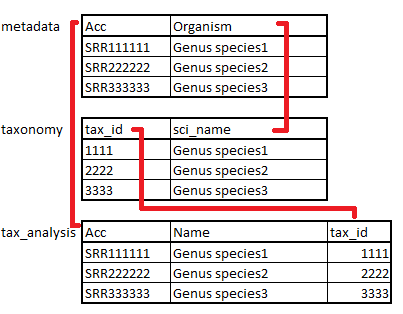

Below we'll combine the two queries from earlier. When specifying multiple tables to search we can also give an abbreviated name to the table ('meta' and 'tax' in the query below) to make the rest of the query easier to type and read.

In [25]:
%%bigquery
SELECT *
FROM `nih-sra-datastore.sra.metadata` meta 
    JOIN `nih-sra-datastore.sra_tax_analysis_tool.taxonomy` tax
    ON meta.organism = tax.sci_name
WHERE tax.tax_id = 9606
    AND meta.organism = 'Homo sapiens'
LIMIT 5

Downloading: 100%|██████████| 5/5 [00:00<00:00,  6.81rows/s]


,acc,assay_type,center_name,consent,experiment,sample_name,instrument,librarylayout,libraryselection,librarysource,...,attributes,jattr,tax_id,parent_id,rank,sci_name,names,ilevel,ileft,iright
0,ERR2511560,AMPLICON,"BIOINFORMATICS LAB, INNOVATION CENTER",public,ERX2530975,SAMEA1116178,Ion S5,SINGLE,PCR,METAGENOMIC,...,"[{'k': 'bases', 'v': '171494517'}, {'k': 'byte...","{""bases"": 171494517, ""bytes"": 140015172, ""alia...",9606,9605,species,Homo sapiens,"[{'name': 'Home sapiens', 'name_class': 'missp...",30,212230,212231
1,ERR2511826,AMPLICON,"BIOINFORMATICS LAB, INNOVATION CENTER",public,ERX2531241,SAMEA1116444,Ion S5,SINGLE,PCR,METAGENOMIC,...,"[{'k': 'bases', 'v': '163581768'}, {'k': 'byte...","{""bases"": 163581768, ""bytes"": 132336304, ""alia...",9606,9605,species,Homo sapiens,"[{'name': 'Home sapiens', 'name_class': 'missp...",30,212230,212231
2,ERR2511209,AMPLICON,"BIOINFORMATICS LAB, INNOVATION CENTER",public,ERX2530624,SAMEA1115827,Ion S5,SINGLE,PCR,METAGENOMIC,...,"[{'k': 'bases', 'v': '191747089'}, {'k': 'byte...","{""bases"": 191747089, ""bytes"": 160929514, ""alia...",9606,9605,species,Homo sapiens,"[{'name': 'Home sapiens', 'name_class': 'missp...",30,212230,212231
3,ERR2511604,AMPLICON,"BIOINFORMATICS LAB, INNOVATION CENTER",public,ERX2531019,SAMEA1116222,Ion S5,SINGLE,PCR,METAGENOMIC,...,"[{'k': 'bases', 'v': '206745187'}, {'k': 'byte...","{""bases"": 206745187, ""bytes"": 165491895, ""alia...",9606,9605,species,Homo sapiens,"[{'name': 'Home sapiens', 'name_class': 'missp...",30,212230,212231
4,ERR2511369,AMPLICON,"BIOINFORMATICS LAB, INNOVATION CENTER",public,ERX2530784,SAMEA1115987,Ion S5,SINGLE,PCR,METAGENOMIC,...,"[{'k': 'bases', 'v': '167396357'}, {'k': 'byte...","{""bases"": 167396357, ""bytes"": 134853975, ""alia...",9606,9605,species,Homo sapiens,"[{'name': 'Home sapiens', 'name_class': 'missp...",30,212230,212231


## How to Show Only the Columns We Want to See
Using * in the select statement will show all the columns in the table. Often we don't need or want all of the columns so we can show only the columns we are interested in. We do this by listing the columns we want in the select statement. These can be from more than one table (for example taxonomy and metadata) as well.

In [20]:
%%bigquery

SELECT meta.acc, meta.assay_type, meta.instrument, meta.libraryselection, meta.librarysource, meta.organism, tax.sci_name
FROM `nih-sra-datastore.sra.metadata` meta 
    JOIN `nih-sra-datastore.sra_tax_analysis_tool.taxonomy` tax
    ON meta.organism = tax.sci_name
WHERE tax.tax_id = 9606
    AND meta.organism = 'Homo sapiens'
    AND meta.assay_type = 'RNA-Seq'
    AND meta.consent = 'public'
LIMIT 5

Downloading: 100%|██████████| 5/5 [00:00<00:00,  8.31rows/s]


,acc,assay_type,instrument,libraryselection,librarysource,organism,sci_name
0,SRR6788175,RNA-Seq,Ion S5,PolyA,TRANSCRIPTOMIC,Homo sapiens,Homo sapiens
1,SRR9047103,RNA-Seq,Ion S5,cDNA,TRANSCRIPTOMIC,Homo sapiens,Homo sapiens
2,SRR8571055,RNA-Seq,Ion S5,cDNA,TRANSCRIPTOMIC,Homo sapiens,Homo sapiens
3,SRR8189069,RNA-Seq,Ion S5,cDNA,TRANSCRIPTOMIC,Homo sapiens,Homo sapiens
4,ERR3431201,RNA-Seq,MinION,other,TRANSCRIPTOMIC,Homo sapiens,Homo sapiens


## Putting it all Together
Now let's look at an example for someone who wants to do an alignment. We will combine some ideas from before as well as ad some math into the search. If you wanted to use the PGAP package from NCBI you would want data that has a high percentage (we'll use 90% as our minimum) of only one species to generate the assembly and annotation for. We can use the output from STAT to do this. 

We want to make an assembly and annotation for Listeria monocytogenes. 
1. We'll use the taxid (1639) to search the tax_id column in the tax_analysis table. 
2. To know what proportion of the spots have been identified to the taxid we are searching for, we also need to use the total analyzed_spot_count from the tax_analysis_info table for each run. 
3. We will need to join these two tables on the run accession (acc) to run this query.

Finally we can sort by the proportion of the spots that were identified as being from the taxid we want to search.

In [21]:
%%bigquery

SELECT a.acc, a.name, info.analyzed_spot_count, a.self_count, a.self_count/info.analyzed_spot_count as proportion
FROM `nih-sra-datastore.sra_tax_analysis_tool.tax_analysis` a 
    JOIN `nih-sra-datastore.sra_tax_analysis_tool.tax_analysis_info` info 
    ON a.acc = info.acc
WHERE  a.tax_id = 1639
    AND a.self_count/info.analyzed_spot_count > .9
    AND info.analyzed_spot_count > 100000
ORDER BY proportion DESC

Downloading: 100%|██████████| 16153/16153 [00:00<00:00, 17533.68rows/s]


,acc,name,analyzed_spot_count,self_count,proportion
0,ERR1817002,Listeria monocytogenes,608593,594332,0.976567
1,ERR1816986,Listeria monocytogenes,692180,673720,0.973331
2,ERR1816981,Listeria monocytogenes,630954,613122,0.971738
3,ERR1816996,Listeria monocytogenes,593342,575904,0.970611
4,ERR1431120,Listeria monocytogenes,3249346,3153217,0.970416
...,...,...,...,...,...
16148,SRR10665812,Listeria monocytogenes,510003,459009,0.900012
16149,SRR2071980,Listeria monocytogenes,1336913,1203238,0.900012
16150,SRR6038661,Listeria monocytogenes,749339,674410,0.900007
16151,ERR1230393,Listeria monocytogenes,803265,722940,0.900002


## Taxonomy ID Searches of STAT Results 
Let's take a minute to talk about why the above query can be so useful. If we were to just look for records with the organism as 'Listeria monocytogenes' we would get almost 51,000 records in the metadata table. Some of them will have little to no sequence data from this organism. There can be many reasons why this would occur but it can make finding data to do analysis on difficult. If we were to look just at the STAT results for every record in the database looking for any data identified from Listeria monocytogenes, we would have over 400,000 records. Many of those results will be a small volume of sequence within metagenomic research. 

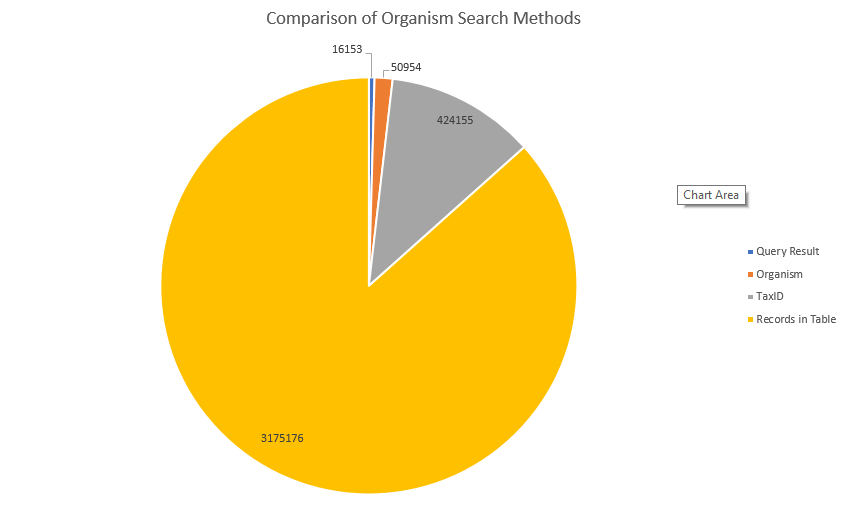

| Method | Hits |
|---------|---------|
| Above Query | 16153 |
| Search using Organism	| 50954 |
| Search using TaxID in STAT | 424155 |
| Unique Accessions in Metadata Table	| 3175176 |

The STAT results are not a definitive anaylsis of the contents of the runs because not all species have reference genomes or will be used when anaylyzing the sequence data in SRA. They should be viewed as a relatively simple way to find records that might have been missed due to organism name discrepancies or to eliminate some runs from our download set based on sequence analysis done by SRA. 